# Ideology and Public Trust in China

In [1]:
import pandas as pd
import numpy as np
import pyreadr
from plotnine import *
import missingno as miss
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dat= pyreadr.read_r('~/Desktop/replication/data/sample10k.RData')
dat= dat['d']

In [3]:
dat= dat.drop(columns= dat.columns[-7:])
dat= dat.reset_index().drop(columns= ["rownames", 'id1', 'id2'], axis=1)
dat.head()

,ipwgt,year,month,day,date,newdate,provgb,overseas,gender,birthyear,...,q40,q47,q42,q43,q49,q45,q48,q41,q44,q50
0,1.000000,2012,10,8,2012-10-08,282.0,11.0,0.0,1,1983,...,2,3,4,3,3,1,2,1,1,1
1,0.333333,2012,9,8,2012-09-08,252.0,15.0,0.0,1,1980,...,3,3,4,2,3,2,3,1,3,3
2,1.000000,2012,4,13,2012-04-13,104.0,33.0,0.0,0,1970,...,3,3,2,3,3,2,1,1,2,3
3,1.000000,2012,3,21,2012-03-21,81.0,44.0,0.0,0,1978,...,3,2,2,2,3,2,1,3,3,4
4,1.000000,2013,5,13,2013-05-13,499.0,33.0,0.0,0,1970,...,1,1,4,3,3,3,3,1,4,3


### Missingness

<AxesSubplot:>

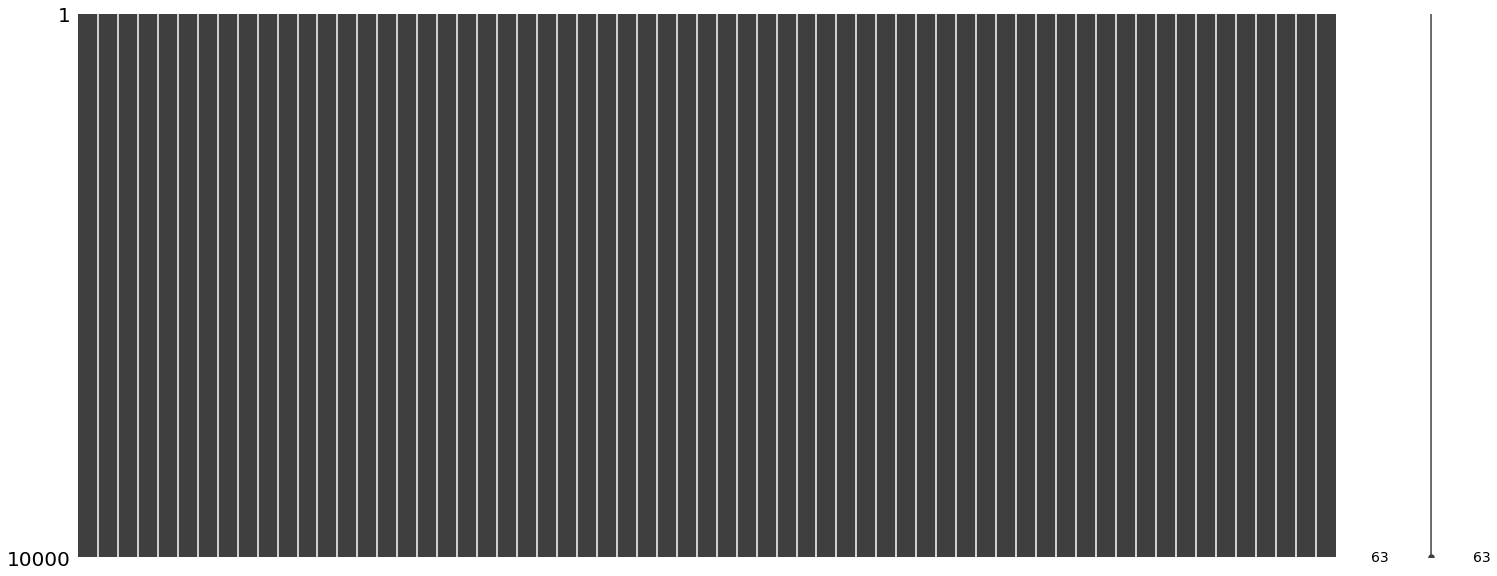

In [4]:
miss.matrix(dat)

### Visualization

In [5]:
viz= dat.copy()

In [6]:
## Make graph more tidy 
education= list()
for i in viz.educ:
    if i==1:
        education.append("Below High School")
    elif i==2:
        education.append("High School")
    elif i==3:
        education.append("College")
    else: 
        education.append("Above College")
        
viz['Education']= education

In [7]:
income= list()
for i in viz.income:
    if i<=2:
        income.append("0-50k")
    elif i>2 and i<=4:
        income.append("50-100k")
    elif i==5:
        income.append("100-150k")
    elif i==6:
        income.append("150-300k")
    else: 
        income.append("Above 300k")

viz['Income']= income

In [8]:
for col in ["Education", "Income", 'q1', 'q3']:
      viz[col] = viz[col].astype('category')

In [9]:
d= viz[["Education", "Income", 'q1','q3']].select_dtypes(include="category").melt()

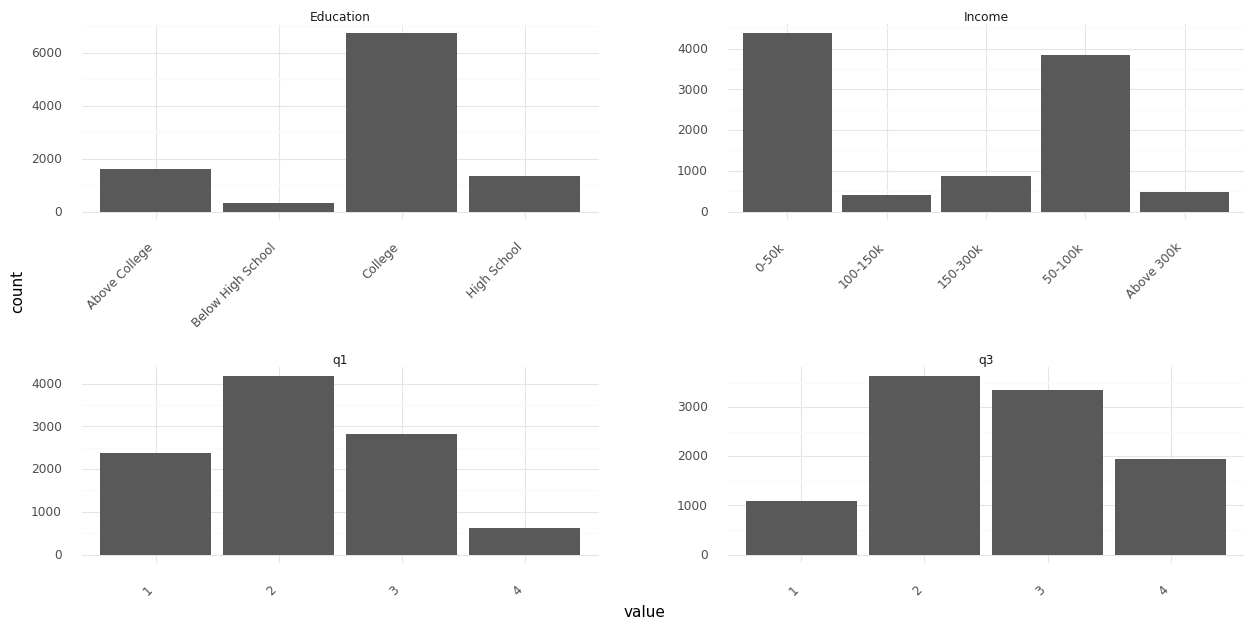

<ggplot: (8791573894063)>

In [10]:
p= (ggplot(d, aes(x="value")) +
     geom_bar() +
     facet_wrap("variable",scales='free') +
     theme_minimal() +
     theme(figure_size=(15,7),
           subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
           axis_text_x=element_text(rotation=45, hjust=1))

)
p

# Preprocessing

### `educ`

In [11]:
edu_dummies= pd.get_dummies(dat.educ)
edu_dummies.columns= ["bhs", "hs", "college", "above_college"]

In [12]:
dat= pd.concat([dat.drop(['educ'],axis=1),edu_dummies], axis=1)

### `Income`

In [13]:
## create income dummies
i0_50k = [1 if i<= 2 else 0 for i in dat.income]
i50_100k= [1 if i>2 and i<=4 else 0 for i in dat.income]
i100_150k = [1 if i== 5 else 0 for i in dat.income]
i150_300k= [1 if i==6 else 0 for i in dat.income]
ia300k = [1 if i== 7 else 0 for i in dat.income]

In [17]:
inc= pd.DataFrame()
for i in [i0_50k, i50_100k, i100_150k, i150_300k, ia300k]:
    output= pd.DataFrame(i)
    inc= pd.concat([inc, output], axis=1)

inc.columns= ['i0_50k', 'i50_100k', 'i100_150k', 'i150_300k', 'ia300k']

In [18]:
inc.sum()/len(inc)

i0_50k       0.4373
i50_100k     0.3848
i100_150k    0.0416
i150_300k    0.0873
ia300k       0.0490
dtype: float64

In [19]:
dat= pd.concat([dat.drop(columns= ['income'], axis=1), inc], axis=1)

###  `provgb`

In [20]:
## create region dummies
north= [1 if i in range(10,20) else 0 for i in dat.provgb]
northeast= [1 if i in range(20,30) else 0 for i in dat.provgb]
east= [1 if i in range(30,40) else 0 for i in dat.provgb]
southcentral= [1 if i in range(40,50) else 0 for i in dat.provgb]
southwest= [1 if i in range(50,60) else 0 for i in dat.provgb]
northwest= [1 if i in range(60,70) else 0 for i in dat.provgb]

In [21]:
region= pd.DataFrame()
for i in [north, northeast, east, southcentral, southwest, northwest]:
    output= pd.DataFrame(i)
    region= pd.concat([region, output], axis=1)

## Adjust the column name
region.columns= ['north', 'northeast', 'east', 'southcentral', 'southwest', 'northwest']

In [22]:
## Get the ratio of each region
region.sum()/len(region)

north           0.1387
northeast       0.1130
east            0.3153
southcentral    0.2935
southwest       0.0889
northwest       0.0506
dtype: float64

In [23]:
dat= pd.concat([dat.drop(columns= ['provgb'], axis=1), region], axis=1)

In [24]:
dat.head()

,ipwgt,year,month,day,date,newdate,overseas,gender,birthyear,age,...,i50_100k,i100_150k,i150_300k,ia300k,north,northeast,east,southcentral,southwest,northwest
0,1.000000,2012,10,8,2012-10-08,282.0,0.0,1,1983,29,...,1,0,0,0,1,0,0,0,0,0
1,0.333333,2012,9,8,2012-09-08,252.0,0.0,1,1980,32,...,1,0,0,0,1,0,0,0,0,0
2,1.000000,2012,4,13,2012-04-13,104.0,0.0,0,1970,42,...,1,0,0,0,0,0,1,0,0,0
3,1.000000,2012,3,21,2012-03-21,81.0,0.0,0,1978,34,...,0,0,1,0,0,0,0,1,0,0
4,1.000000,2013,5,13,2013-05-13,499.0,0.0,0,1970,43,...,1,0,0,0,0,0,1,0,0,0


### Binary scale

In [25]:
dat= dat.drop(columns= dat.columns[: 7], axis=1)

In [26]:
dat_bi= dat.copy()

## Transfer categorical variables to binary scale
for i in range(50):
    colname= str('q')+ str(i+1)
    dat_bi[colname]= 1*(dat_bi[colname] > 2.5)

### Index

In [27]:
## Political Institutions (PI) includes Q1,2,3,4,5,10,12,13,14,17
## Pro-democracy direction is 1, pro-authoritarianism is -1
## Deduct 2.5 for every question to make sure the midpoint is 0

pi= dat[['q2','q4','q5','q10','q12','q13','q14','q17']]- 2.5 
pi_index= pi['q2']- pi['q4']- pi['q5']- pi['q10']+ pi['q12']- pi['q13']+ pi['q14']+ pi['q17']

In [28]:
## Individual Freedom (fr) includes Q6,7,8,24,44,45
## Pro-freedom (+1), anti-freedom(-1)
fr= dat[['q6','q7','q8','q24','q44','q45']]-2.5
fr_index= fr['q6']+ fr['q7']- fr['q8']+ fr['q24']- fr['q44']+ fr['q45']

In [29]:
## Free Market (fm) includes Q21,25,27,29,30,37,40
fm= dat[['q21','q25','q27','q29','q30','q37','q40']]-2.5
fm_index= -0.5*fm['q21']- fm['q25']- fm['q27']+ fm['q29']- fm['q30']+ fm['q37']+ 0.5*fm['q40']

In [30]:
## Labor vs Capital (soc) includes Q22,31,33,34,36,38
## Pro-Socialism (+1), anti-Socialism(-1)
soc= dat[['q22','q31','q32','q33','q34','q36','q38']]- 2.5
soc_index= (soc['q22']- soc['q31']+ soc['q32']+ soc['q33']- soc['q34']- soc['q36']+ soc['q38'])

In [31]:
## Globalization (GLO) includes Q23,26,28,35,39
## Pro-globalization (+1), anti-globalization (-1)
glo= dat[['q11','q23','q26','q28','q35','q39']]- 2.5
glo_index= glo['q11']- glo['q23']- glo['q26']+ glo['q39']- glo['q28']- glo['q35']

In [32]:
## Traditionalism (TR) includes Q41,42,43,46,47,48,49,50
## Pro-tradition (+1), pro-modernization(-1)
tr= dat[['q41','q42','q43','q46','q47','q48','q49','q50']]- 2.5
tr_index= -(tr['q41']-tr['q42']- tr['q43']- tr['q46']- tr['q47']- tr['q48']- tr['q49']+ tr['q50'])

In [33]:
## Nationalism (NAT) includes Q9,11,15,16,18,19,20
## Pro-nationalism(+1), anti-nationalism(-1)
nat= dat[['q9','q15','q16','q18','q19','q20']]- 2.5
nat_index= nat['q9']+ nat['q15']+ nat['q16']- nat['q18']+ nat['q19']+ nat['q20']

In [34]:
df_index= pd.DataFrame(dict(Democracy= pi_index, Freedom= fr_index,
                            Market= fm_index, Socialism= soc_index,
                            Globalization= glo_index, Traditionalism= tr_index, Nationalism= nat_index))
corr = df_index.corr()
corr

,Democracy,Freedom,Market,Socialism,Globalization,Traditionalism,Nationalism
Democracy,1.000000,0.362833,0.530834,-0.328602,0.079154,-0.512630,-0.667453
Freedom,0.362833,1.000000,0.242034,-0.112926,0.023090,-0.167249,-0.362105
Market,0.530834,0.242034,1.000000,-0.383166,0.298983,-0.549212,-0.607873
Socialism,-0.328602,-0.112926,-0.383166,1.000000,-0.180820,0.430743,0.375132
Globalization,0.079154,0.023090,0.298983,-0.180820,1.000000,-0.191904,-0.183326
Traditionalism,-0.512630,-0.167249,-0.549212,0.430743,-0.191904,1.000000,0.584949
Nationalism,-0.667453,-0.362105,-0.607873,0.375132,-0.183326,0.584949,1.000000


In [35]:
df_index.mean()

Democracy         0.35540
Freedom          -0.52510
Market           -0.50635
Socialism         1.55590
Globalization    -1.05710
Traditionalism    0.75540
Nationalism       1.00690
dtype: float64

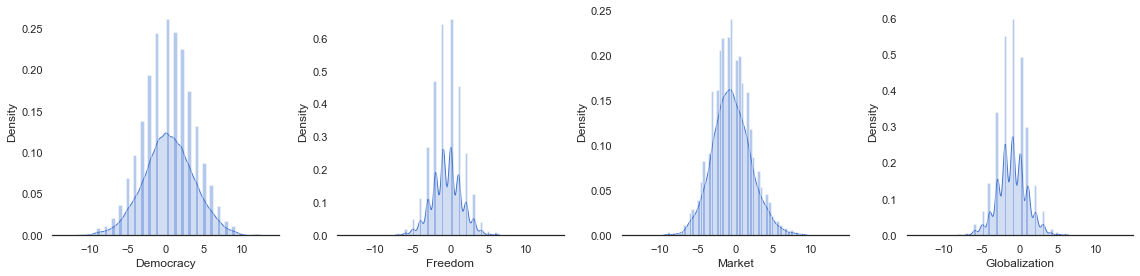

In [36]:
sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(1, 4, figsize=(16, 4), sharex=True)
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(df_index["Democracy"], kde=True, color="b",kde_kws={"shade": True}, ax=ax[0])
sns.distplot(df_index["Freedom"], kde=True, color="b",kde_kws={"shade": True},ax=ax[1])
sns.distplot(df_index["Market"], kde=True, color="b", kde_kws={"shade": True}, ax=ax[2])
sns.distplot(df_index["Globalization"], kde=True, color="b", kde_kws={"shade": True}, ax=ax[3])
plt.tight_layout()
plt.savefig('index_1.png', dpi=400)

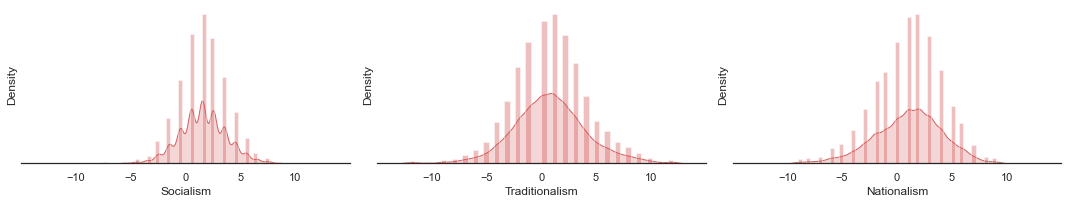

In [37]:
sns.set(style="white", palette="muted", color_codes=True)
f, ax = plt.subplots(1, 3, figsize=(15, 3), sharex=True)
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df_index["Socialism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[0])
sns.distplot(df_index["Traditionalism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[1])
sns.distplot(df_index["Nationalism"], kde=True, color="r", kde_kws={"shade": True}, ax=ax[2])

plt.setp(ax, yticks= [])
plt.tight_layout()
plt.savefig('index_2.png', dpi=400)

### correlation matrix

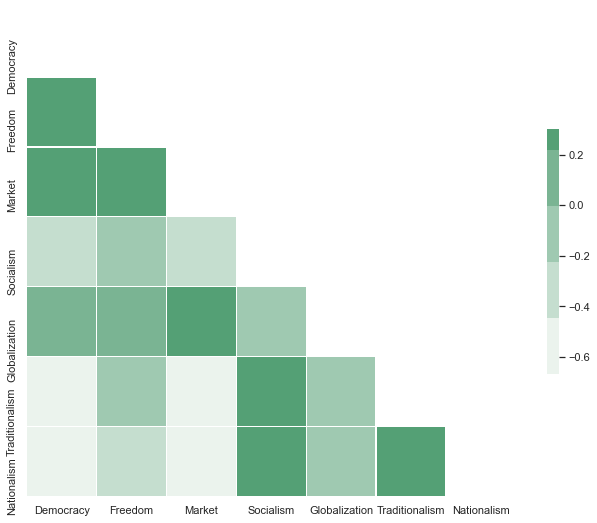

In [38]:
# Generate a mask for the upper triangle
mask= np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f,ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap= sns.light_palette("seagreen")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig("corrmatrix.png", dpi=400)

## Train Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DTreg
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn import preprocessing as pp 
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [40]:
df_index['q1']= 1* (dat['q1']>2.5)
df_index['q3']= 1* (dat['q3']>2.5)

In [41]:
for i in dat.columns[53:]:
    df_index[i]= dat[i]
    
df_index['age']= dat['age']
df_index['gender']= dat['gender']

In [42]:
df_index

,Democracy,Freedom,Market,Socialism,Globalization,Traditionalism,Nationalism,q1,q3,bhs,...,i150_300k,ia300k,north,northeast,east,southcentral,southwest,northwest,age,gender
0,-5.0,-4.0,-4.0,3.5,-1.0,7.0,6.0,1,0,0,...,0,0,1,0,0,0,0,0,29,1
1,2.0,-5.0,0.0,1.5,1.0,4.0,3.0,1,0,0,...,0,0,1,0,0,0,0,0,32,1
2,6.0,2.0,0.0,6.5,-4.0,1.0,-2.0,0,1,0,...,0,0,0,0,1,0,0,0,42,0
3,1.0,1.0,0.5,-1.5,-3.0,-6.0,-6.0,1,1,0,...,1,0,0,0,0,1,0,0,34,0
4,-1.0,-1.0,0.0,4.5,-6.0,3.0,5.0,1,1,0,...,0,0,0,0,1,0,0,0,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,-1.0,1.0,2.5,-3.0,-1.0,2.0,0,1,0,...,1,0,0,0,0,1,0,0,37,0
9996,-1.0,-1.0,-2.5,0.5,-1.0,-1.0,2.0,1,0,0,...,0,0,0,0,1,0,0,0,39,1
9997,-5.0,-5.0,0.0,-0.5,-1.0,-2.0,2.0,0,0,0,...,0,0,0,0,1,0,0,0,18,0
9998,-12.0,-5.0,-4.5,6.5,-2.0,4.0,9.0,1,0,0,...,0,1,0,0,1,0,0,0,43,0


In [46]:
df_index['qs']= np.where((df_index['q1']> df_index['q3']), 1, 0)
df_index['qs'].value_counts()

0    7945
1    2055
Name: qs, dtype: int64

In [47]:
df_index.to_csv("iptic_index.csv")

### train-test split

In [48]:
y1 = dat_bi[['q1']]
X1 = dat_bi.drop(columns=['q1', 'birthyear'], axis=1)
train_X1, test_X1, train_y1, test_y1= train_test_split(X1,y1,test_size = .25,random_state=123)

## Parametric Models

### Ridge Regression (Index)

#### `q1`

In [49]:
yi = df_index['q1']
Xi = df_index.drop(columns=['q1', 'q3','qs'], axis=1)
train_Xi, test_Xi, train_yi, test_yi= train_test_split(Xi,yi,test_size = .25,random_state=123)

In [50]:
## Set up LR
LR = LogisticRegression(solver='saga', tol=1e-2, max_iter=500, 
                              random_state=123)

distributions = dict(C=uniform(0,10), penalty=['l1', 'l2', 'none'])

In [51]:
rad_search_iq1= RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_iq1.fit(train_Xi,train_yi)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fef26b5eb50>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [52]:
print(rad_search_iq1.best_score_, rad_search_iq1.best_estimator_)

0.6646666666666666 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [53]:
glmiq1= rad_search_iq1.best_estimator_
glmiq1_pred_y= glmiq1.predict(test_Xi)
m.accuracy_score(test_yi, glmiq1_pred_y)

0.6628

In [97]:
glm_iq1= pd.DataFrame(dict(variable= train_Xi.columns))
glm_iq1['coef']= rad_search_iq1.best_estimator_.coef_.tolist()[0]
glm_iq1

,variable,coef
0,Democracy,-0.066444
1,Freedom,-0.085014
2,Market,-0.040521
3,Socialism,-0.011284
4,Globalization,0.016509
5,Traditionalism,-0.009083
6,Nationalism,0.024408
7,bhs,0.133379
8,hs,-0.029736
9,college,0.002811


#### Statistical Model

In [55]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [83]:
a= train_Xi.copy()
a['q1']= train_yi

In [70]:
ff_iq1= "q1~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [95]:
glm_mod_iq1 = logit(ff_iq1, data= a).fit_regularized(method= "l1", alpha= 1/(0.5967789660956835))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.620339097558414
            Iterations: 127
            Function evaluations: 132
            Gradient evaluations: 127


In [98]:
## Create a 95% CIs
glm_iq1= glm_mod_iq1.conf_int().iloc[1:]
glm_iq1['coef']= glm_mod_iq1.params
glm_iq1.columns= ['low', 'high', 'coef']
glm_iq1= glm_iq1.reset_index().rename(columns={"index": "variable"})
glm_iq1['sd']= abs((glm_iq1['high']- glm_iq1['low'])/3.92)
glm_iq1

,variable,low,high,coef,sd
0,Democracy,-0.086626,-0.046823,-0.066724,0.010154
1,Freedom,-0.109646,-0.057781,-0.083714,0.013231
2,Market,-0.066391,-0.016551,-0.041471,0.012714
3,Socialism,-0.035509,0.012917,-0.011296,0.012354
4,Globalization,-0.007701,0.042136,0.017217,0.012714
5,Traditionalism,-0.027065,0.009965,-0.008550,0.009446
6,Nationalism,0.000657,0.047175,0.023916,0.011867
7,hs,-0.313919,0.028864,-0.142528,0.087445
8,college,-0.231122,0.010456,-0.110333,0.061627
9,above_college,NaN,NaN,0.000000,NaN


In [106]:
labels= ['Democracy','Freedom','Market','Socialism','Globalization','Traditionalism', 'Nationalism','High School',
 'College','Above college','50-100k','100-150k','150-300k','Above 300k',
 'North','Northeast','East','Southcentral','Southwest','Age','Gender']

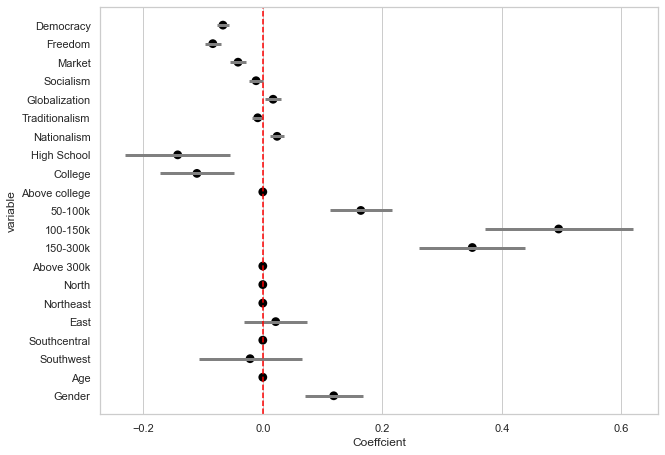

In [116]:
f,ax= plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")

sns.pointplot(x="coef", y= "variable", data= glm_iq1, dodge=True, join=False, ci= None, color= "black")
ax.errorbar(glm_iq1.coef, glm_iq1.variable, xerr= glm_iq1.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=3)
## Add x=o
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("coefq1.png", dpi=400)

#### `q3`

In [117]:
yi3 = df_index['q3']
Xi3 = df_index.drop(columns=['q1', 'q3', 'qs'], axis=1)
train_Xi3, test_Xi3, train_yi3, test_yi3= train_test_split(Xi3,yi3,test_size = .25,random_state=123)

In [118]:
rad_search_iq3 = RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_iq3.fit(train_Xi3,train_yi3)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fef26b5eb50>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [119]:
print(rad_search_iq3.best_score_, rad_search_iq3.best_estimator_)

0.7358666666666667 LogisticRegression(C=0.5967789660956835, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [121]:
glmiq3= rad_search_iq3.best_estimator_
glmiq3_pred_y= glmiq3.predict(test_Xi3)
m.accuracy_score(test_yi3, glmiq3_pred_y)

0.7364

In [124]:
ff_iq3= "q1~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [125]:
glm_mod_iq3 = logit(ff_iq3,df_index).fit_regularized(method= "l1", alpha= 1/(0.5967789660956835))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6206364558833064
            Iterations: 123
            Function evaluations: 127
            Gradient evaluations: 123


In [126]:
## Create a 95% CIs
glm_iq3= glm_mod_iq3.conf_int().iloc[1:]
glm_iq3['coefficient']= glm_mod_iq3.params
glm_iq3.columns= ['low', 'high', 'coefficient']
glm_iq3= glm_iq3.reset_index().rename(columns={"index": "variable"})
glm_iq3['sd']= abs((glm_iq3['high']- glm_iq3['low'])/3.92)
glm_iq3

,variable,low,high,coefficient,sd
0,Democracy,-0.080675,-0.044522,-0.062598,0.009223
1,Freedom,-0.113695,-0.066636,-0.090165,0.012005
2,Market,-0.052841,-0.007066,-0.029954,0.011677
3,Socialism,-0.029140,0.015357,-0.006891,0.011351
4,Globalization,-0.004792,0.040407,0.017808,0.011530
5,Traditionalism,-0.022438,0.011677,-0.005381,0.008703
6,Nationalism,0.002656,0.045283,0.023970,0.010874
7,hs,-0.300666,0.005792,-0.147437,0.078178
8,college,-0.224043,-0.025082,-0.124563,0.050755
9,above_college,NaN,NaN,0.000000,NaN


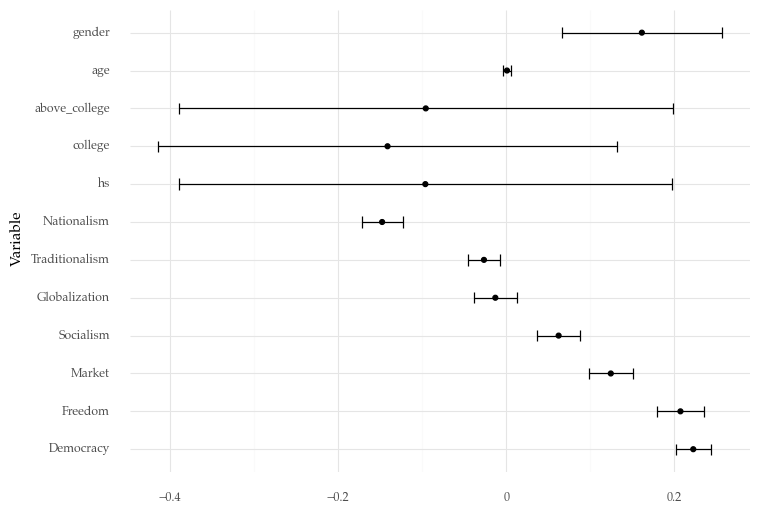

<ggplot: (8791570399663)>

In [68]:
q3= (
    ggplot(glm_iq3,
          aes(x="variable",y="coefficient")) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.3) +
    scale_x_discrete(limits=glm_iq3.variable.tolist()) +
    coord_flip() +
    labs(y="",x="Variable") +
    theme_minimal()+ 
    theme(figure_size=(8,6), text=element_text(family="Palatino"))
)
q3

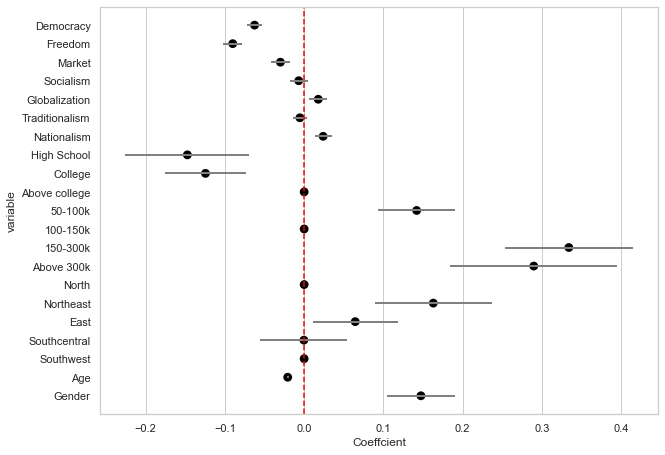

In [127]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iq3, dodge=True, join= False, color= "black")
ax.errorbar(glm_iq3.coefficient, glm_iq3.variable, xerr= glm_iq3.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=o
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("coefq3.png", dpi=400)

### `q1`*`q3`

In [132]:
yiqs = df_index['qs']
Xiqs = df_index.drop(columns=['q1','q3','qs'], axis=1)
train_Xiqs, test_Xiqs, train_yiqs, test_yiqs= train_test_split(Xiqs,yiqs,test_size = .25,random_state=123)

In [133]:
rad_search_iqs = RandomizedSearchCV(LR, distributions, random_state=123)
rad_search_iqs.fit(train_Xiqs,train_yiqs)
print(rad_search_iqs.best_score_, rad_search_iqs.best_estimator_)

0.7964 LogisticRegression(C=6.964691855978616, max_iter=500, penalty='none',
                   random_state=123, solver='saga', tol=0.01)


In [134]:
glmiqs= rad_search_iqs.best_estimator_
glmiqs_pred_y= glmiqs.predict(test_Xiqs)
m.accuracy_score(test_yiqs, glmiqs_pred_y)

0.7952

In [135]:
ff_qs= "qs~Democracy+ Freedom+ Market+ Socialism+ Globalization+ Traditionalism+ Nationalism+ hs+ college+ above_college+ i50_100k+ i100_150k+ i150_300k+ ia300k+ north+ northeast+ east+ southcentral+ southwest+ age+ gender"

In [136]:
glm_mod_iqs= logit(ff_qs, df_index).fit()

Optimization terminated successfully.
         Current function value: 0.449349
         Iterations 6


In [137]:
## Create a 95% CIs
glm_iqs= glm_mod_iqs.conf_int().iloc[1:]
glm_iqs['coefficient']= glm_mod_iqs.params
glm_iqs.columns= ['low', 'high', 'coefficient']
glm_iqs= glm_iqs.reset_index().rename(columns={"index": "variable"})
glm_iqs['sd']= abs((glm_iqs['high']- glm_iqs['low'])/3.92)
glm_iqs

,variable,low,high,coefficient,sd
0,Democracy,-0.161349,-0.116527,-0.138938,0.011434
1,Freedom,-0.194896,-0.135140,-0.165018,0.015244
2,Market,-0.108637,-0.051714,-0.080176,0.014521
3,Socialism,-0.050913,0.004491,-0.023211,0.014134
4,Globalization,0.002733,0.059200,0.030966,0.014405
5,Traditionalism,-0.031706,0.010097,-0.010804,0.010664
6,Nationalism,0.056492,0.110565,0.083528,0.013794
7,hs,-0.461157,0.194493,-0.133332,0.167258
8,college,-0.351884,0.262911,-0.044487,0.156836
9,above_college,-0.368786,0.299990,-0.034398,0.170606


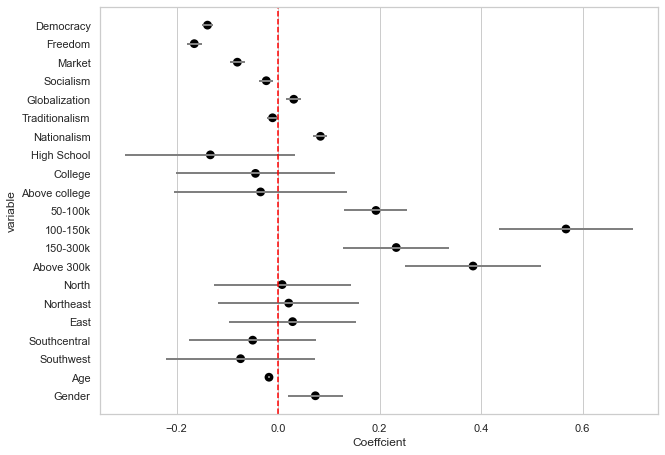

In [139]:
f,ax = plt.subplots(figsize=(10, 7.5))
sns.set_style("whitegrid")
sns.pointplot(x="coefficient", y= "variable", data= glm_iqs, dodge=True, join= False, color= "black")
ax.errorbar(glm_iqs.coefficient, glm_iqs.variable, xerr= glm_iqs.sd, ls= "None",
            ecolor= "gray", capthick=0.2, elinewidth=2)
## Add x=o
plt.axvline(x=0, color= "red", linestyle='--')

## Rename labels 
ax.set_yticklabels(labels)
ax.set_xlabel("Coeffcient")

f.savefig("coefiqs.png", dpi=400)

## Ridge Regression

In [346]:
rad_search_q1 = RandomizedSearchCV(LR, distributions, random_state=123)

rad_search_q1.fit(train_X,train_y)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=500, random_state=123,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb188fecc40>,
                                        'penalty': ['l1', 'l2', 'none']},
                   random_state=123)

In [347]:
print(rad_search_q1.best_score_, rad_search_q1.best_estimator_)

0.7717333333333334 LogisticRegression(C=4.010175566612036, max_iter=500, penalty='l1',
                   random_state=123, solver='saga', tol=0.01)


In [348]:
lassoq1= rad_search_q1.best_estimator_

In [349]:
lassoq1_pred_y= lassoq1.predict(test_X)

In [350]:
m.accuracy_score(test_y, lassoq1_pred_y)

0.7692

In [352]:
lassoq1mod= pd.DataFrame(dict(variable= train_X.columns))
lassoq1mod['coef']= rad_search_q1.best_estimator_.coef_.tolist()[0]
lassoq1mod['likelihood']= np.exp(lassoq1mod['coef'])/(1+np.exp(lassoq1mod['coef']))

## Arrange the features in a descending way
lassoq1mod = lassoq1mod.sort_values(by= "coef",ascending=False).reset_index(drop=True)

In [353]:
lassoq1mod

,variable,coef,likelihood
0,q6,1.188947,0.766553
1,q32,0.454714,0.611760
2,q12,0.380688,0.594039
3,q2,0.354671,0.587750
4,q7,0.307065,0.576169
...,...,...,...
61,q9,-0.288285,0.428424
62,q4,-0.289423,0.428145
63,q48,-0.321256,0.420370
64,q20,-0.351487,0.413022


## Non-parametric Models

In [396]:
## Set the folds index to ensure comparable samples
fold_generator= KFold(n_splits=10, shuffle=True,random_state=1234)

In [397]:
pipe = Pipeline(steps=[('pre_process', pp.StandardScaler()),('model',None)])

In [398]:
search_space = [
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,15,20,30,40,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4,5,6,7,8,9,10]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4,5,6,7,8,9,10],
    'model__n_estimators':[10,250,500,750,1000]}
]

### Binary `q3`

In [39]:
y = (dat_bi[['q3']])
X = (dat_bi.drop(columns=['q3', 'birthyear'], axis=1))
train_X, test_X, train_y, test_y= train_test_split(X,y,test_size = .25,random_state=123)

In [399]:
search_bq3 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [400]:
search_bq3.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', StandardScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=750)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [401]:
search_bq3.best_score_

0.8842597260496114

In [402]:
search_bq3.best_params_

{'model': RandomForestClassifier(max_depth=10, n_estimators=750),
 'model__max_depth': 10,
 'model__n_estimators': 750}

In [403]:
rf_mod_bq3= search_bq3.best_estimator_

In [404]:
m.roc_auc_score(train_y,rf_mod_bq3.predict(train_X))

0.9289886543711185

In [405]:
m.accuracy_score(train_y,rf_mod_bq3.predict(train_X))

0.9288

### Index `q3`

In [455]:
search_iq3 = GridSearchCV(pipe, search_space_i, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

search_iq3.fit(train_Xi3,train_yi3)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', StandardScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [456]:
print(search_iq3.best_params_, search_iq3.best_score_)

{'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000} 0.8317119371641416


In [459]:
rf_mod_iq3= search_iq3.best_estimator_

In [460]:
m.roc_auc_score(train_yi3,rf_mod_iq3.predict(train_Xi3))

0.843340279481315

In [462]:
m.accuracy_score(train_yi3,rf_mod_iq3.predict(train_Xi3))

0.8424

### Multiclass `q3`

In [49]:
y_mq3 = pp.label_binarize(dat[['q3']], classes= [1,2,3,4])
X_mq3 = dat.drop(columns=['q3', 'birthyear'], axis=1)
train_X_mq3, test_X_mq3, train_y_mq3, test_y_mq3= train_test_split(X_mq3,y_mq3,test_size = .25,random_state=123)

In [51]:
search_mq3 = GridSearchCV(pipe, search_space, 
                      cv= fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [52]:
search_mq3.fit(train_X_mq3,train_y_mq3)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', StandardScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [53]:
print(search_mq3.best_params_, search_mq3.best_score_)

{'model': RandomForestClassifier(max_depth=10, n_estimators=1000), 'model__max_depth': 10, 'model__n_estimators': 1000} 0.8620451787867396


In [54]:
rf_mod_mq3= search_mq3.best_estimator_

In [83]:
m.roc_auc_score(train_y_mq3,rf_mod_mq3.predict(train_X_mq3))

0.8029251463127464

In [84]:
m.accuracy_score(train_y_mq3,rf_mod_mq3.predict(train_X_mq3))

0.6782666666666667

###  `q1`

In [418]:
search_bq1 = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)

In [419]:
search_bq1.fit(train_X1,train_y1)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', StandardScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
                         {'model': [RandomForestClassifier(max_depth=10,
                                                           n_estimators=1000)],
                          'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'model__n_estimators': [10, 250, 500, 750, 1000]}],
             scoring='roc_auc')

In [420]:
search_bq1.best_score_

0.7506942200339378

In [421]:
search_bq1.best_params_

{'model': RandomForestClassifier(max_depth=10, n_estimators=1000),
 'model__max_depth': 10,
 'model__n_estimators': 1000}

In [422]:
rf_mod_bq1= search_bq1.best_estimator_

In [423]:
m.roc_auc_score(train_y1,rf_mod_bq1.predict(train_X1))

0.8323984724381851

In [424]:
m.accuracy_score(train_y1,rf_mod_bq1.predict(train_X1))

0.882

### Permutation Importance

In [406]:
from sklearn.inspection import permutation_importance

In [447]:
## With 25 repeat to get a more accurate estimation
vi= permutation_importance(rf_mod_bq3, train_X, train_y, n_repeats=25)

In [453]:
## Organize as a data frame 
vi_dat= pd.DataFrame(dict(variable=train_X.columns,
                           vi= vi['importances_mean'],
                           std= vi['importances_std']))

vi_dat = vi_dat.sort_values(by= "vi",ascending=False).reset_index(drop=True)

vi_dat

,variable,vi,std
0,q6,0.071968,0.001893
1,q12,0.027589,0.001369
2,q2,0.022112,0.001353
3,age,0.021344,0.000875
4,q9,0.017237,0.001200
...,...,...,...
61,northwest,0.001141,0.000131
62,150_300k,0.000757,0.000241
63,above300k,0.000507,0.000113
64,100_150k,0.000491,0.000145


Text(0, 0.5, 'Variable')

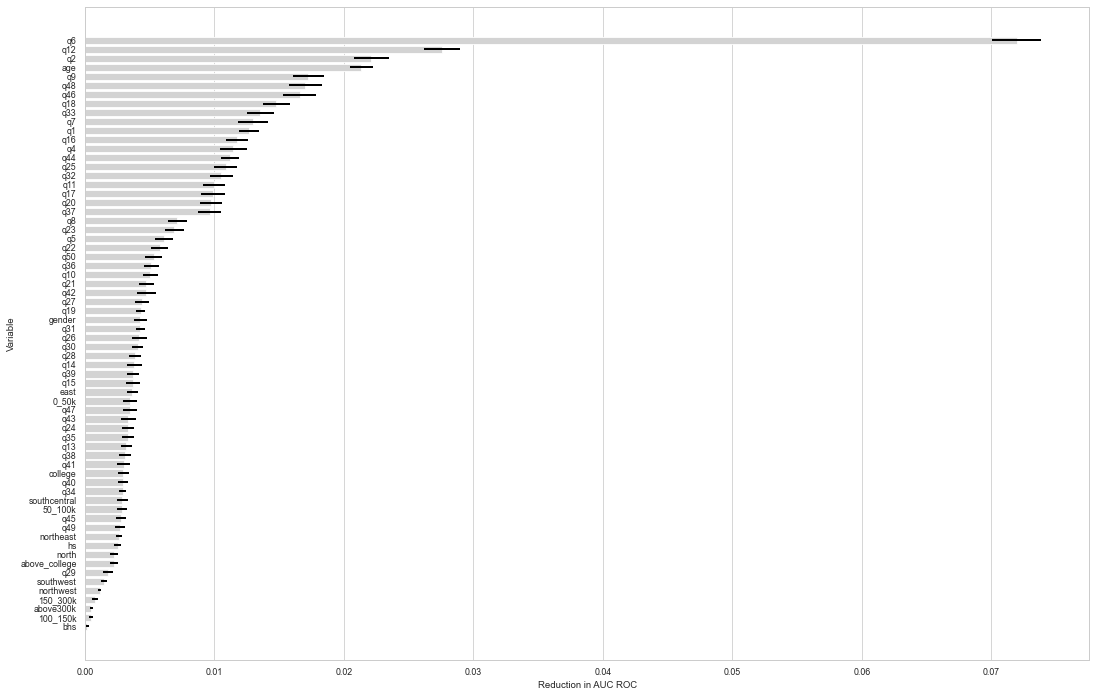

In [454]:
f,ax = plt.subplots(figsize=(18, 12))
sns.set_style("whitegrid")
sns.barplot(x="vi", y= "variable", data= vi_dat, color= "lightgray")
ax.errorbar(x= 'vi', y= "variable", xerr= 'std', data= vi_dat, ls= "None",
            ecolor= "black", capthick=0.2, elinewidth=2)
ax.set_xlabel("Reduction in AUC ROC")
ax.set_ylabel("Variable")

### PDP

### Tree

In [99]:
pred_y= rf_mod_bq3.predict_proba(train_X)[:,1]
pred_y

array([0.26236274, 0.96083494, 0.20363152, ..., 0.55218039, 0.40849409,
       0.48316531])

In [332]:
rf_mod_mq3.predict_proba(train_X_mq3)[1][:,1]

array([0.55053838, 0.0167604 , 0.57461241, ..., 0.25004089, 0.4363313 ,
       0.42005533])

In [100]:
surrogate_model= DTreg(max_depth=4)
surrogate_model.fit(train_X,pred_y)

DecisionTreeRegressor(max_depth=4)

In [101]:
m.r2_score(pred_y,surrogate_model.predict(train_X)).round(2)

0.73

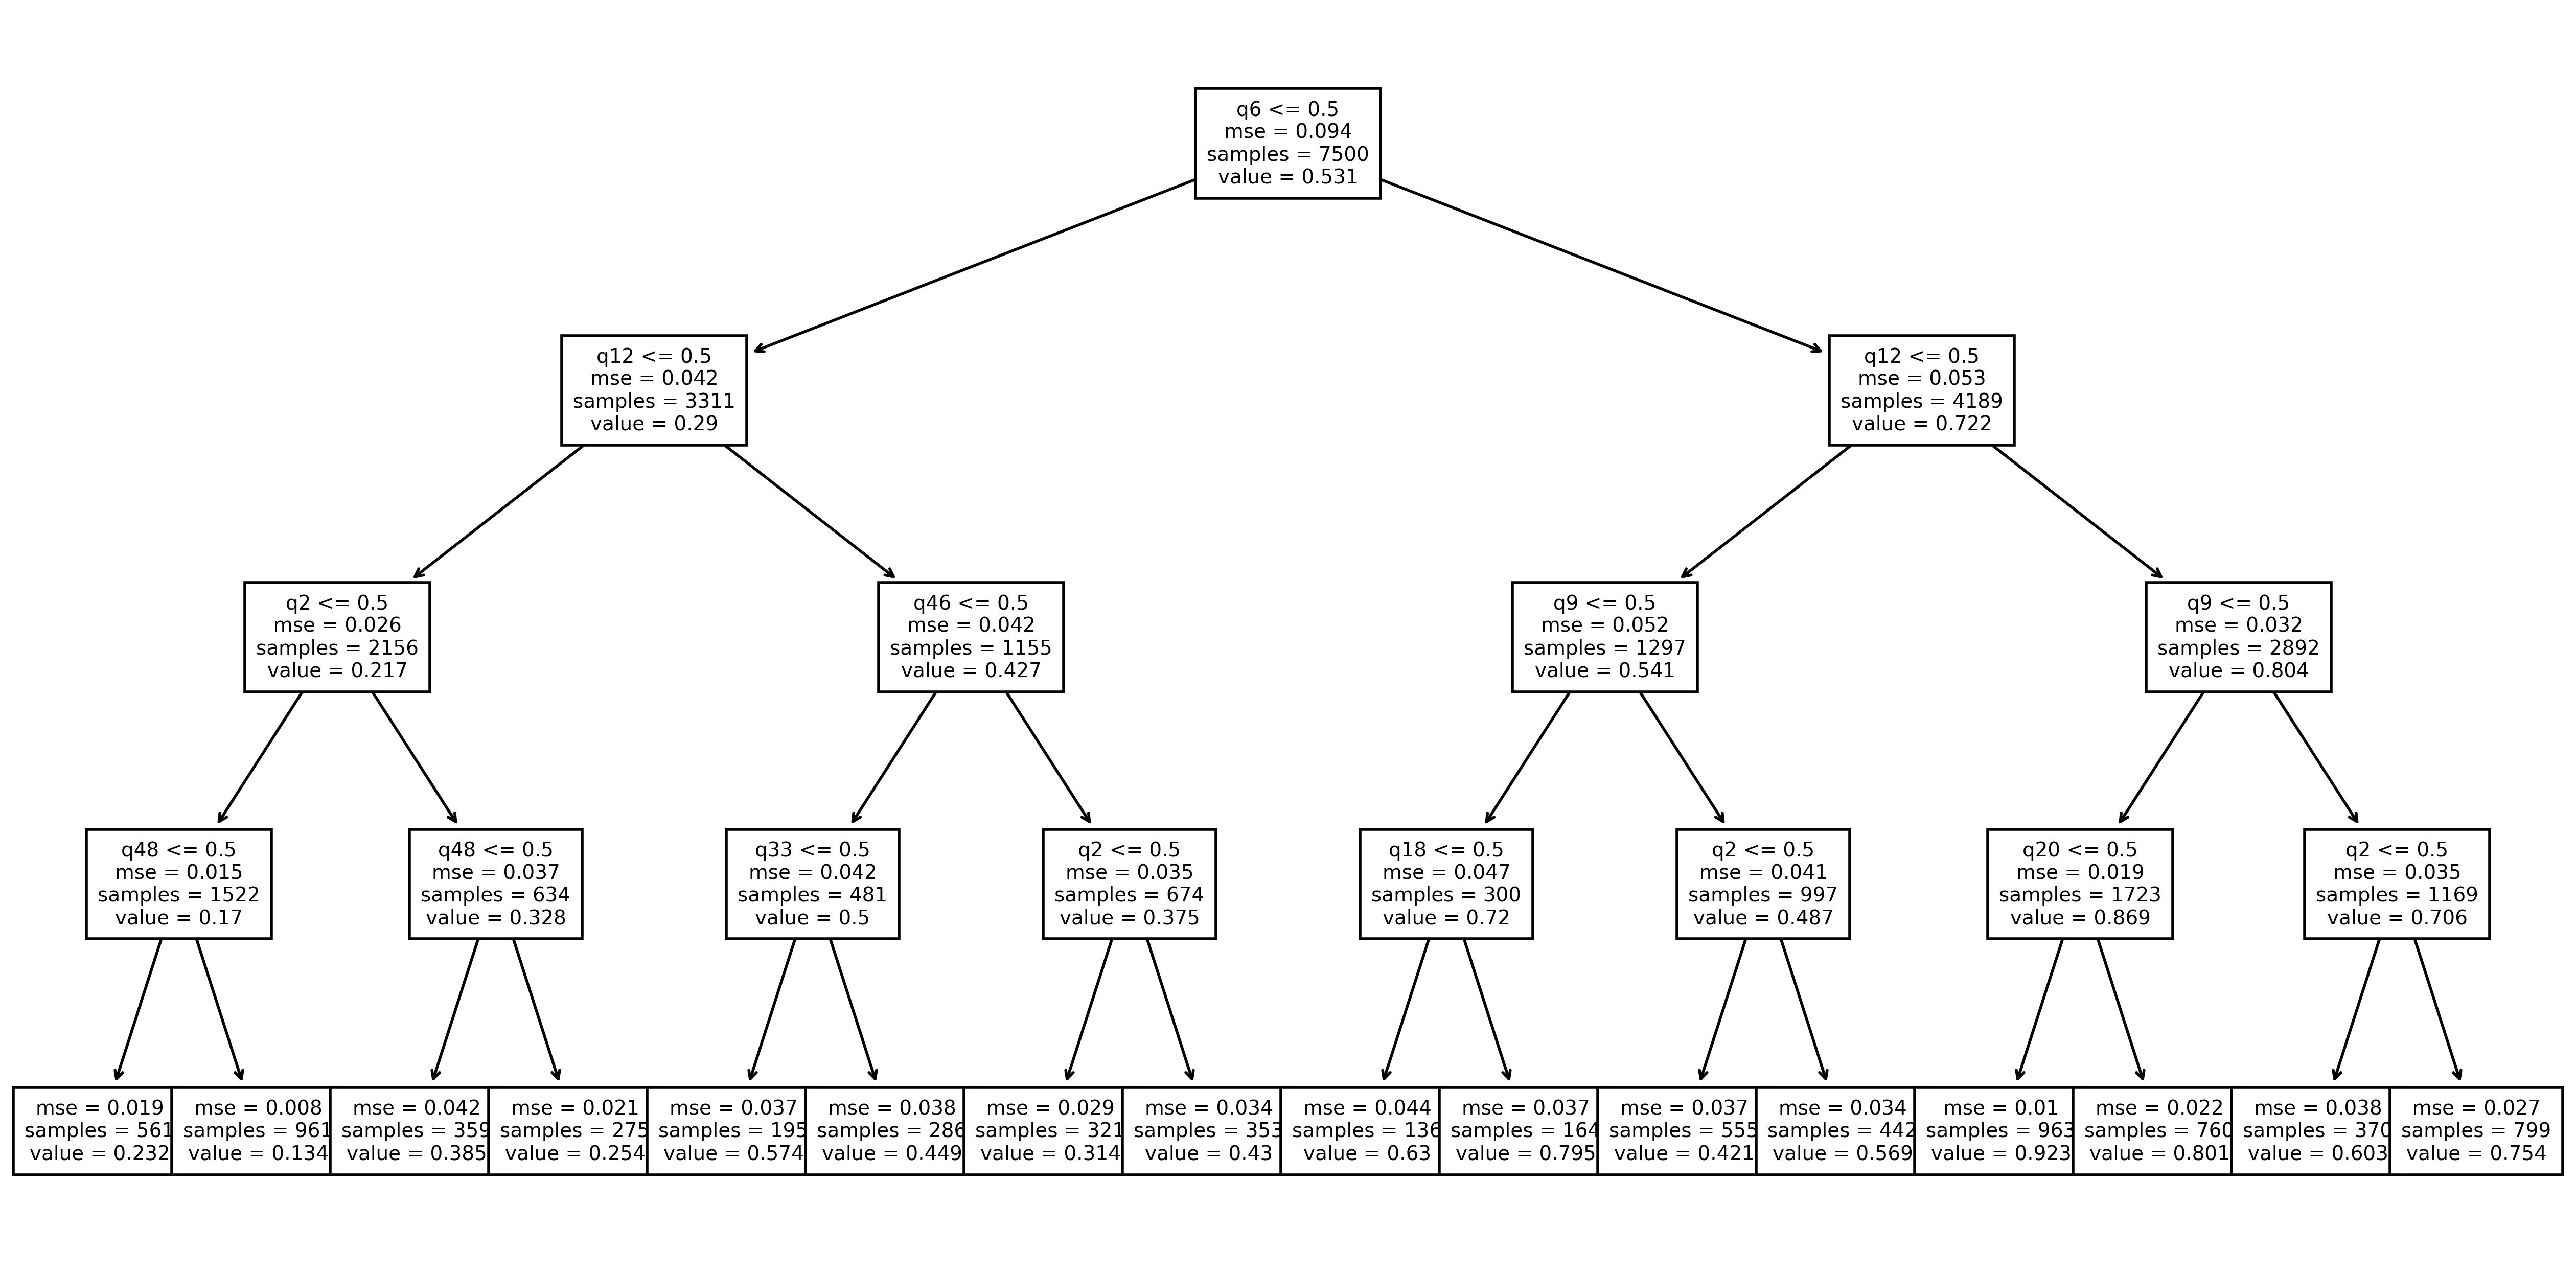

In [102]:
## Plot the tree
plt.figure(figsize=(16,8),dpi=400)
rules = tree.plot_tree(surrogate_model,feature_names=train_X_mq3.columns,fontsize=7)